In [1]:
import pandas as pd

In [2]:
X_test = pd.read_csv("C:/Users/pharv/Documents/GitHub/MLFlow_prj/data/processed/cleaned_test_data.csv")


In [3]:
X_balanced = pd.read_csv("C:/Users/pharv/Documents/GitHub/MLFlow_prj/data/processed/x_balanced.csv")


In [4]:
y_balanced = pd.read_csv("C:/Users/pharv/Documents/GitHub/MLFlow_prj/data/processed/engineered_train_data.csv")

## Training Model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
model = RandomForestClassifier()

In [9]:
model.fit(X_train, y_train)

C:\Users\pharv\AppData\Local\Temp\ipykernel_4704\180087699.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [10]:
y_val

,TARGET
1799,0
6624,0
13594,1
2308,0
7836,1
...,...
14202,1
6951,0
6690,1
5743,0


## Evaluation and test of the Model

In [11]:
model_predict = model.predict(X_val)

In [12]:
#Evaluate the model:
print("accuracy on training set: %f" % model.score(X_train, y_train))
print("accuracy on test set: %f" % model.score(X_val, y_val))

accuracy on training set: 1.000000
accuracy on test set: 0.964098


## Save the model

In [13]:
import joblib
joblib.dump(model, "C:/Users/pharv/Documents/GitHub/MLFlow_prj/models/rf_model.pkl")

['C:/Users/pharv/Documents/GitHub/MLFlow_prj/models/rf_model.pkl']

## Shap Values

In [14]:
import shap

c:\Users\pharv\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
explainer = shap.TreeExplainer(model)

In [16]:
shap_values_test = explainer.shap_values(X_val,approximate=True)

In [17]:
# Explanations for a specific point of your data set
choosen_instance = X_val.iloc[0]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [18]:
shap_values_test

[array([[-0.00272406, -0.00166948,  0.00076962, ...,  0.00611638,
          0.00167263, -0.00905705],
        [-0.00353575, -0.00169675,  0.00495849, ...,  0.00320728,
          0.00401393, -0.00333634],
        [-0.00146247, -0.00350354,  0.00159903, ...,  0.00534325,
         -0.0015028 , -0.02888995],
        ...,
        [-0.00875935, -0.00052982,  0.0022619 , ..., -0.01572246,
          0.00221261,  0.00762053],
        [ 0.00313524, -0.00169386, -0.00205256, ...,  0.00564774,
          0.00148559, -0.00885439],
        [-0.00095256, -0.00278412, -0.0076656 , ..., -0.02008517,
         -0.00449195, -0.02994824]]),
 array([[ 0.00272406,  0.00166948, -0.00076962, ..., -0.00611638,
         -0.00167263,  0.00905705],
        [ 0.00353575,  0.00169675, -0.00495849, ..., -0.00320728,
         -0.00401393,  0.00333634],
        [ 0.00146247,  0.00350354, -0.00159903, ..., -0.00534325,
          0.0015028 ,  0.02888995],
        ...,
        [ 0.00875935,  0.00052982, -0.0022619 , ...,  

In [19]:
X_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100107,Cash loans,M,Y,Y,0,180000.0,296280.0,21690.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
1,100128,Cash loans,F,Y,Y,1,225000.0,431280.0,23526.0,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,4.0
2,100561,Cash loans,M,Y,Y,0,180000.0,67500.0,8140.5,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
3,100699,Cash loans,M,Y,Y,1,225000.0,323460.0,23134.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100770,Cash loans,M,Y,N,0,202500.0,697500.0,33687.0,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,455243,Cash loans,F,Y,Y,1,112500.0,252531.0,26005.5,234000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1735,455607,Cash loans,M,Y,Y,0,387000.0,350415.0,25051.5,292500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
1736,455703,Cash loans,F,Y,Y,1,450000.0,790830.0,57676.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1737,455940,Cash loans,M,Y,Y,0,202500.0,225000.0,19242.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0


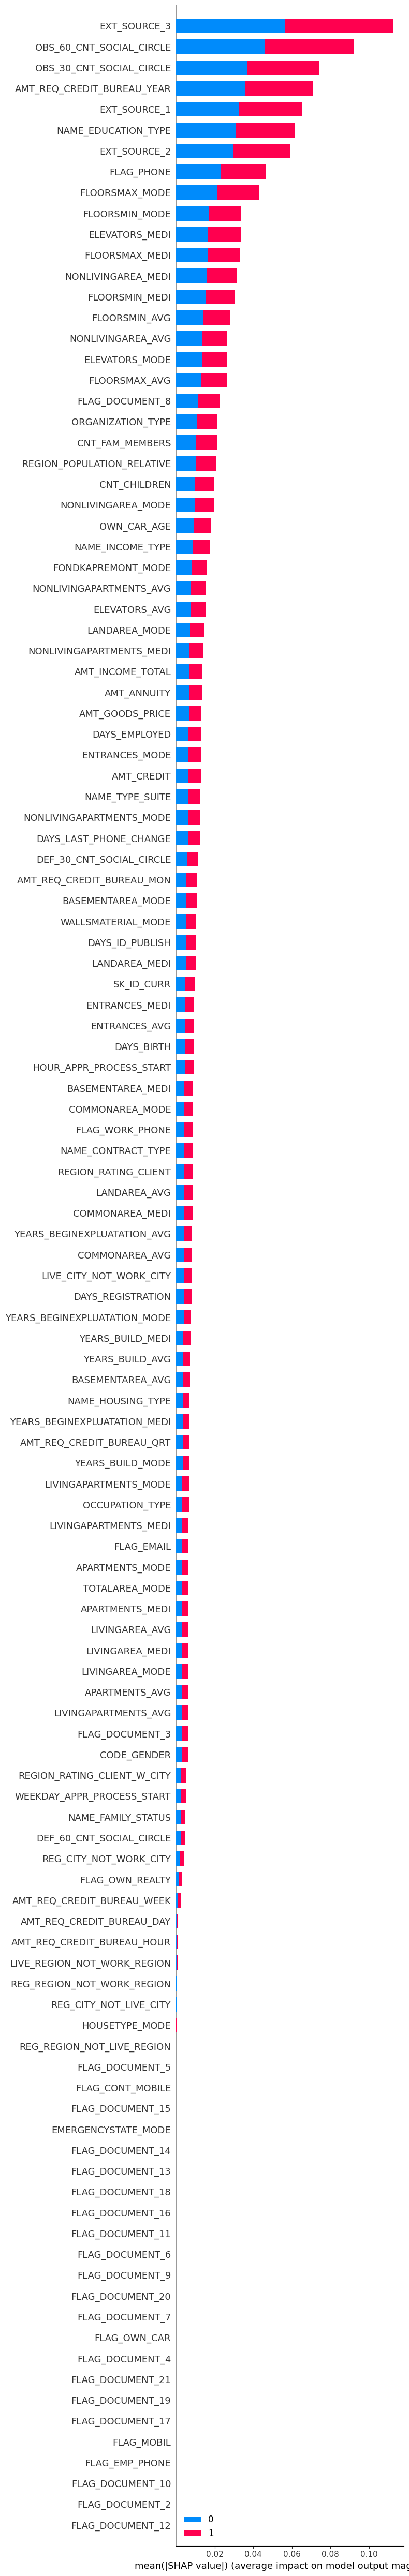

In [20]:
#summary plot for each class on the whole dataset
shap.summary_plot(shap_values_test,X_test, max_display=X_train.shape[1],class_names=model.classes_)